In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [150]:
# Load dataset
df = pd.read_csv("/content/Final_data (1).csv")

In [151]:
# Summary of missing values
print(df.isnull().sum())
print("\n% Missing per column:\n", (df.isnull().mean() * 100).round(2))

Unnamed: 0             0
week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64

% Missing per column:
 Unnamed: 0           0.00
week_of_outbreak     0.00
state_ut             0.00
district             0.00
Disease              0.00
Cases                0.00
Deaths              71.57
day                  0.00
mon                  0.00
year                 0.00
Latitude             0.00
Longitude            0.00
preci                1.51
LAI                 24.43
Temp                10.44
dtype: float64


In [152]:
from google.colab import files

# File paths
input_path = "/content/Final_data (1).csv"
output_path = "/content/Cleaned_epidemic.csv"

# Load dataset
df = pd.read_csv(input_path)

# Drop 'Deaths' column (too many missing values)
if 'Deaths' in df.columns:
    df = df.drop(columns=['Deaths'])

# Interpolate continuous climate features
for col in ['Temp', 'preci', 'LAI']:
    if col in df.columns:
        df[col] = df.groupby(['state_ut', 'district'])[col].transform(
            lambda x: x.interpolate(method='linear').fillna(x.mean())
        )

# Save cleaned dataset
df.to_csv(output_path, index=False)

# Download the cleaned file
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
print(df.isnull().sum())

Unnamed: 0            0
week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
day                   0
mon                   0
year                  0
Latitude              0
Longitude             0
preci               136
LAI                  49
Temp                 53
dtype: int64


In [154]:
for col in ['Temp','preci','LAI']:
    df[col] = df.groupby(['state_ut','district'])[col].transform(
        lambda x: x.interpolate(method='linear').fillna(x.mean())
    )


In [155]:
for col in ['Temp','preci','LAI']:
    df[col] = df.groupby(['state_ut','district'])[col].transform(lambda x: x.fillna(x.mean()))


In [156]:
print(df.isnull().sum())

Unnamed: 0            0
week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
day                   0
mon                   0
year                  0
Latitude              0
Longitude             0
preci               136
LAI                  49
Temp                 53
dtype: int64


In [157]:
# Load dataset
file_path = "/content/Final_data (1).csv"   # your path
df = pd.read_csv(file_path)

# Drop unnecessary index column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("Before Cleaning - Missing values:\n", df.isnull().sum())
print("\n% Missing:\n", (df.isnull().mean()*100).round(2))

# === Step 1: Interpolate within each district ===
for col in ['Temp', 'preci', 'LAI']:
    if col in df.columns:
        df[col] = df.groupby(['state_ut','district'])[col].transform(
            lambda x: x.interpolate(method='linear')
        )

# === Step 2: Fill remaining NaN with district mean ===
for col in ['Temp', 'preci', 'LAI']:
    if col in df.columns:
        df[col] = df.groupby(['state_ut','district'])[col].transform(
            lambda x: x.fillna(x.mean())
        )

# === Step 3: Fill any leftovers with global mean ===
for col in ['Temp', 'preci', 'LAI']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

print("\nAfter Cleaning - Missing values:\n", df.isnull().sum())
print("\n% Missing:\n", (df.isnull().mean()*100).round(2))

# Save final cleaned dataset
output_path = "/content/Final_Cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Final cleaned dataset saved at: {output_path}")


Before Cleaning - Missing values:
 week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64

% Missing:
 week_of_outbreak     0.00
state_ut             0.00
district             0.00
Disease              0.00
Cases                0.00
Deaths              71.57
day                  0.00
mon                  0.00
year                 0.00
Latitude             0.00
Longitude            0.00
preci                1.51
LAI                 24.43
Temp                10.44
dtype: float64

After Cleaning - Missing values:
 week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0


In [158]:
# Load dataset
file_path = "/content/Final_data (1).csv"   # your path
df = pd.read_csv(file_path)

# Drop unnecessary index column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("Before Cleaning - Missing values:\n", df.isnull().sum())
print("\n% Missing:\n", (df.isnull().mean()*100).round(2))

# === Step 1: Interpolate within each district ===
for col in ['Temp', 'preci', 'LAI']:
    if col in df.columns:
        df[col] = df.groupby(['state_ut','district'])[col].transform(
            lambda x: x.interpolate(method='linear')
        )

# === Step 2: Fill remaining NaN with district mean ===
for col in ['Temp', 'preci', 'LAI']:
    if col in df.columns:
        df[col] = df.groupby(['state_ut','district'])[col].transform(
            lambda x: x.fillna(x.mean())
        )

# === Step 3: Fill any leftovers with global mean ===
for col in ['Temp', 'preci', 'LAI']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

print("\nAfter Cleaning - Missing values:\n", df.isnull().sum())
print("\n% Missing:\n", (df.isnull().mean()*100).round(2))

# === Step 4: Drop 'Deaths' column (too many missing) ===
if "Deaths" in df.columns:
    df = df.drop(columns=["Deaths"])
    print("\n✅ 'Deaths' column dropped successfully!")

# Re-check missing values after dropping
print("\nAfter Dropping 'Deaths' - Missing values:\n", df.isnull().sum())
print("\n% Missing:\n", (df.isnull().mean() * 100).round(2))

# Print final dataset shape & sample
print("\nFinal Dataset Shape:", df.shape)
print("\nSample of Final Dataset:\n", df.head())

# Save the final dataset
final_path = "/content/Final_epidemic_clean.csv"
df.to_csv(final_path, index=False)
print(f"\n✅ Final dataset (Deaths dropped) saved at: {final_path}")


Before Cleaning - Missing values:
 week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64

% Missing:
 week_of_outbreak     0.00
state_ut             0.00
district             0.00
Disease              0.00
Cases                0.00
Deaths              71.57
day                  0.00
mon                  0.00
year                 0.00
Latitude             0.00
Longitude            0.00
preci                1.51
LAI                 24.43
Temp                10.44
dtype: float64

After Cleaning - Missing values:
 week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0


**Final_epidemic_clean.csv dataset**

In [159]:
# Load dataset
file_path = "/content/Final_epidemic_clean.csv"
df = pd.read_csv(file_path)

In [160]:
# Shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (8985, 13)


In [161]:
# Column info (data types, non-null counts)
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8985 entries, 0 to 8984
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week_of_outbreak  8985 non-null   object 
 1   state_ut          8985 non-null   object 
 2   district          8985 non-null   object 
 3   Disease           8985 non-null   object 
 4   Cases             8985 non-null   object 
 5   day               8985 non-null   int64  
 6   mon               8985 non-null   int64  
 7   year              8985 non-null   int64  
 8   Latitude          8985 non-null   float64
 9   Longitude         8985 non-null   float64
 10  preci             8985 non-null   float64
 11  LAI               8985 non-null   float64
 12  Temp              8985 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 912.7+ KB
None


In [162]:
# Descriptive statistics (mean, std, min, max)
print("\nDescriptive Statistics:")
print(df.describe(include="all"))


Descriptive Statistics:
       week_of_outbreak     state_ut district                   Disease Cases  \
count              8985         8985     8985                      8985  8985   
unique               53           36      791                        22   523   
top           30th week  Maharashtra   Tumkur  Acute Diarrhoeal Disease    15   
freq                316         1195      119                      5126   301   
mean                NaN          NaN      NaN                       NaN   NaN   
std                 NaN          NaN      NaN                       NaN   NaN   
min                 NaN          NaN      NaN                       NaN   NaN   
25%                 NaN          NaN      NaN                       NaN   NaN   
50%                 NaN          NaN      NaN                       NaN   NaN   
75%                 NaN          NaN      NaN                       NaN   NaN   
max                 NaN          NaN      NaN                       NaN   NaN   

  

In [163]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
week_of_outbreak    0
state_ut            0
district            0
Disease             0
Cases               0
day                 0
mon                 0
year                0
Latitude            0
Longitude           0
preci               0
LAI                 0
Temp                0
dtype: int64


In [164]:
 #Column names
print("\nColumns in Dataset:", df.columns.tolist())



Columns in Dataset: ['week_of_outbreak', 'state_ut', 'district', 'Disease', 'Cases', 'day', 'mon', 'year', 'Latitude', 'Longitude', 'preci', 'LAI', 'Temp']


In [165]:
# Sample first 5 rows
print("\nSample Data:")
print(df.head())


Sample Data:
  week_of_outbreak     state_ut            district                   Disease  \
0         1st week    Meghalaya  East Jaintia Hills  Acute Diarrhoeal Disease   
1         2nd week  Maharashtra          Gadchiroli                   Malaria   
2         3rd week   Tamil Nadu          Pudukottai  Acute Diarrhoeal Disease   
3         3rd week      Gujarat               Patan  Acute Diarrhoeal Disease   
4         3rd week       Kerala           Ernakulam  Acute Diarrhoeal Disease   

  Cases  day  mon  year   Latitude  Longitude     preci   LAI        Temp  
0   160    2    1  2022  25.251576  92.484050  0.020354  34.5  291.533333  
1     7   10    1  2022  19.759070  80.162281  0.007479   9.0  299.970000  
2     8   18    1  2022  10.382651  78.819126  0.107413  12.0  300.766667  
3     7   11    1  2022  23.774057  71.683735  0.065094   9.0  299.080000  
4    14   24   12  2021   9.984080  76.274146  0.041256  33.0  303.028000  


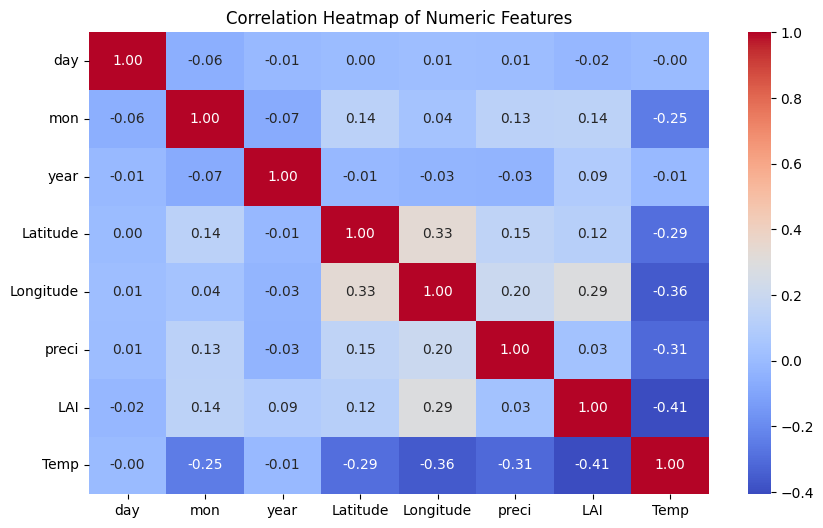

In [166]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Data Tranformation

In [167]:
# ---------------- Load & Clean Dataset ----------------

file_path = "/content/Final_epidemic_clean.csv"
df = pd.read_csv(file_path)

# Ensure Cases is numeric
df["Cases"] = pd.to_numeric(df["Cases"], errors="coerce").fillna(0)

# Create Date column
df["date"] = pd.to_datetime(dict(year=df.year, month=df.mon, day=df.day))

# ---------------- Feature Engineering ----------------
# Sort rows by state, district, and date
df = df.sort_values(["state_ut", "district", "year", "mon", "day"]).reset_index(drop=True)

# 1. Log Transformation (fix skewness)
df["Cases_log"] = np.log1p(df["Cases"])   # log(1+Cases) to handle zero cases safely

# 2. Lag features
df["Cases_lag1"] = df.groupby(["state_ut","district"])["Cases_log"].shift(1).fillna(0)
df["Cases_lag2"] = df.groupby(["state_ut","district"])["Cases_log"].shift(2).fillna(0)

# 3. Rolling mean (no leakage across districts)
df["Cases_roll3"] = (
    df.groupby(["state_ut","district"])["Cases_log"]
    .transform(lambda x: x.shift(1).rolling(3).mean())
    .fillna(0)
)

# 4. Seasonality features
df["quarter"] = df["date"].dt.quarter
df["is_monsoon"] = df["mon"].isin([6,7,8,9]).astype(int)

# 5. Rare disease handling (group rare classes)
disease_counts = df["Disease"].value_counts()
rare_diseases = disease_counts[disease_counts < 50].index   # threshold = <50 samples
df["Disease"] = df["Disease"].replace(rare_diseases, "Other_Diseases")

# Drop unnecessary columns
df_transformed = df.drop(columns=["week_of_outbreak", "date"])

# ---------------- Encoding (NO leakage) ----------------
# Only encode input features (district), keep Disease and state_ut separate
df_features = df_transformed.drop(columns=["Disease", "state_ut"])
df_encoded = pd.get_dummies(
    df_features,
    columns=["district"],  # one-hot encode district
    drop_first=True
)

print("Data Transformation Completed")
print("Shape after encoding:", df_encoded.shape)
print("Columns:", df_encoded.columns[:20], "...")


Data Transformation Completed
Shape after encoding: (8985, 805)
Columns: Index(['Cases', 'day', 'mon', 'year', 'Latitude', 'Longitude', 'preci', 'LAI',
       'Temp', 'Cases_log', 'Cases_lag1', 'Cases_lag2', 'Cases_roll3',
       'quarter', 'is_monsoon', 'district_Adilabad', 'district_Agar Malwa',
       'district_Agartala', 'district_Agra', 'district_Ahmadabad'],
      dtype='object') ...


**Exploratory Data Analysis (EDA)**

Text(0.5, 0, 'Cases')

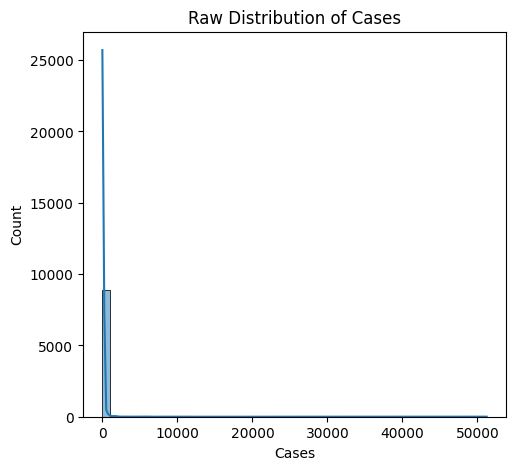

In [168]:
# 1. Distribution of Raw vs Log Cases
# ---------------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Cases"], bins=50, kde=True)
plt.title("Raw Distribution of Cases")
plt.xlabel("Cases")

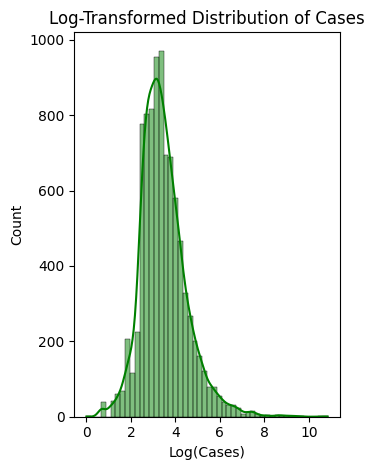

In [169]:
plt.subplot(1,2,2)
sns.histplot(df["Cases_log"], bins=50, kde=True, color="green")
plt.title("Log-Transformed Distribution of Cases")
plt.xlabel("Log(Cases)")

plt.tight_layout()
plt.show()

In [170]:
print("Raw Skewness:", df["Cases"].skew())
print("Raw Kurtosis:", df["Cases"].kurt())
print("Log Skewness:", df["Cases_log"].skew())
print("Log Kurtosis:", df["Cases_log"].kurt())

Raw Skewness: 45.96012252792086
Raw Kurtosis: 2625.8255919762096
Log Skewness: 1.0162234584510925
Log Kurtosis: 2.9577946100349046


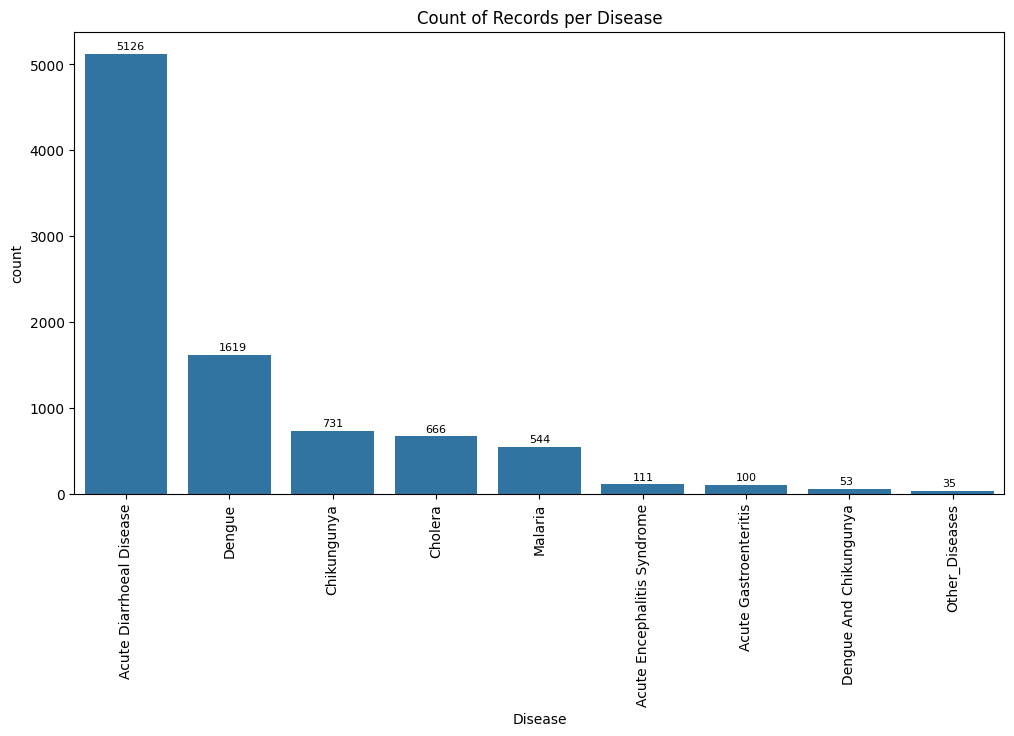

In [171]:
#Count of Each Disease
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Disease", order=df["Disease"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Count of Records per Disease")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+50), fontsize=8)
plt.show()


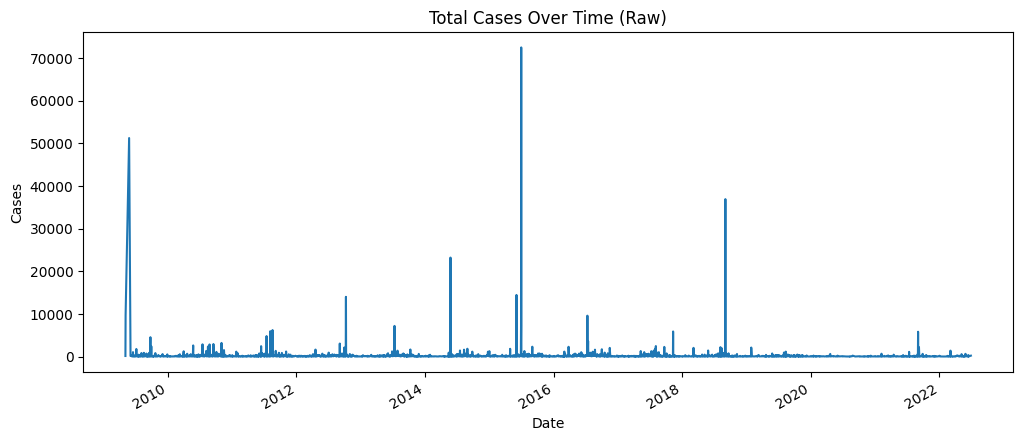

In [172]:
# Cases Trend Over Time (Log Scale)

if "date" in df.columns:
    cases_trend = df.groupby("date")["Cases"].sum()

    plt.figure(figsize=(12,5))
    cases_trend.plot()
    plt.title("Total Cases Over Time (Raw)")
    plt.ylabel("Cases")
    plt.xlabel("Date")
    plt.show()

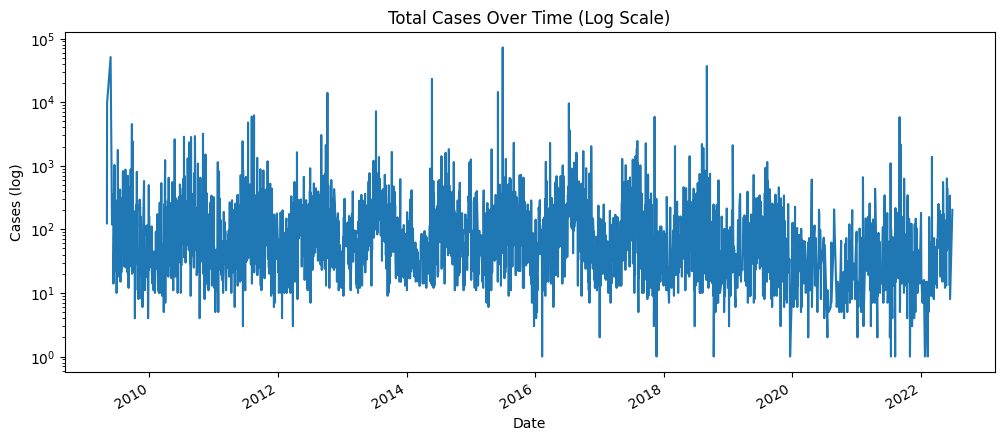

In [173]:
# Log scale
plt.figure(figsize=(12,5))
cases_trend.plot(logy=True)
plt.title("Total Cases Over Time (Log Scale)")
plt.ylabel("Cases (log)")
plt.xlabel("Date")
plt.show()

/tmp/ipython-input-3477325703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_cases.values, y=corr_cases.index, palette="coolwarm")


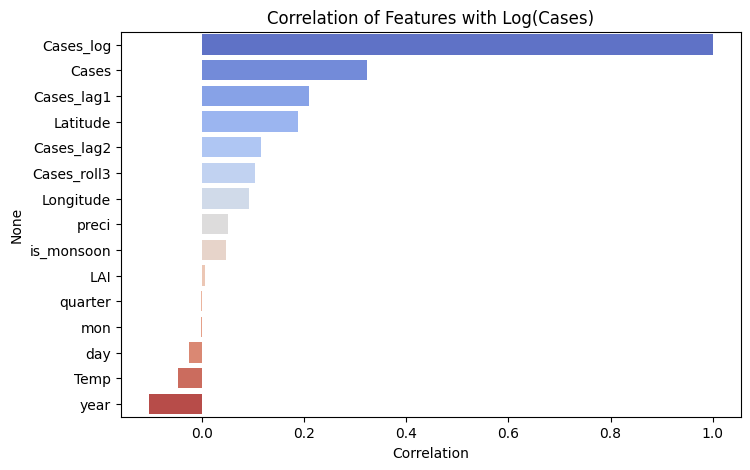

In [174]:
#Correlation with Cases (Log Adjusted)
plt.figure(figsize=(8,5))
corr_cases = df.corr(numeric_only=True)["Cases_log"].sort_values(ascending=False)
sns.barplot(x=corr_cases.values, y=corr_cases.index, palette="coolwarm")
plt.title("Correlation of Features with Log(Cases)")
plt.xlabel("Correlation")
plt.show()

/tmp/ipython-input-3386745072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cases.index, y=avg_cases.values, palette="viridis")


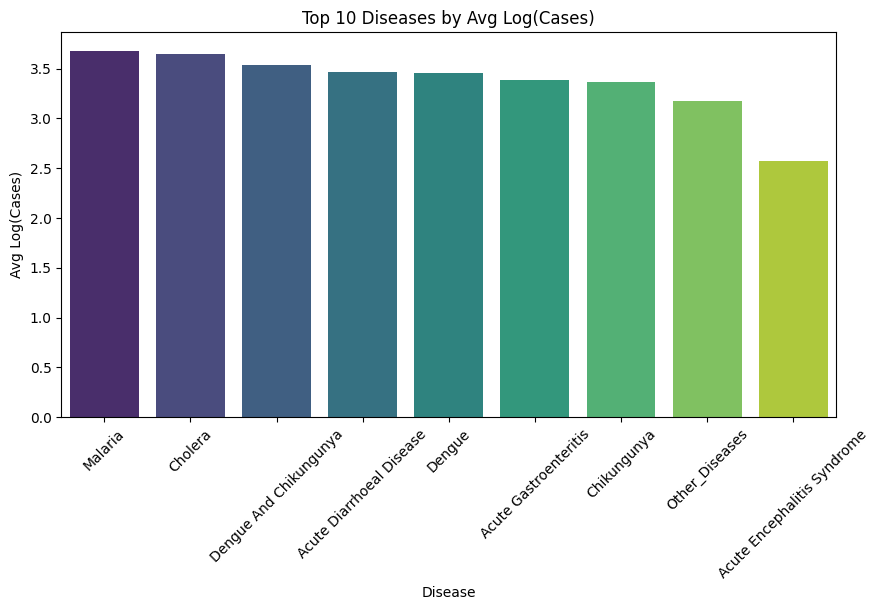

In [175]:
# Top 10 Diseases by Average Log Cases

avg_cases = df.groupby("Disease")["Cases_log"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_cases.index, y=avg_cases.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Diseases by Avg Log(Cases)")
plt.ylabel("Avg Log(Cases)")
plt.show()

/tmp/ipython-input-446865967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.index, y=top_districts.values, palette="mako")


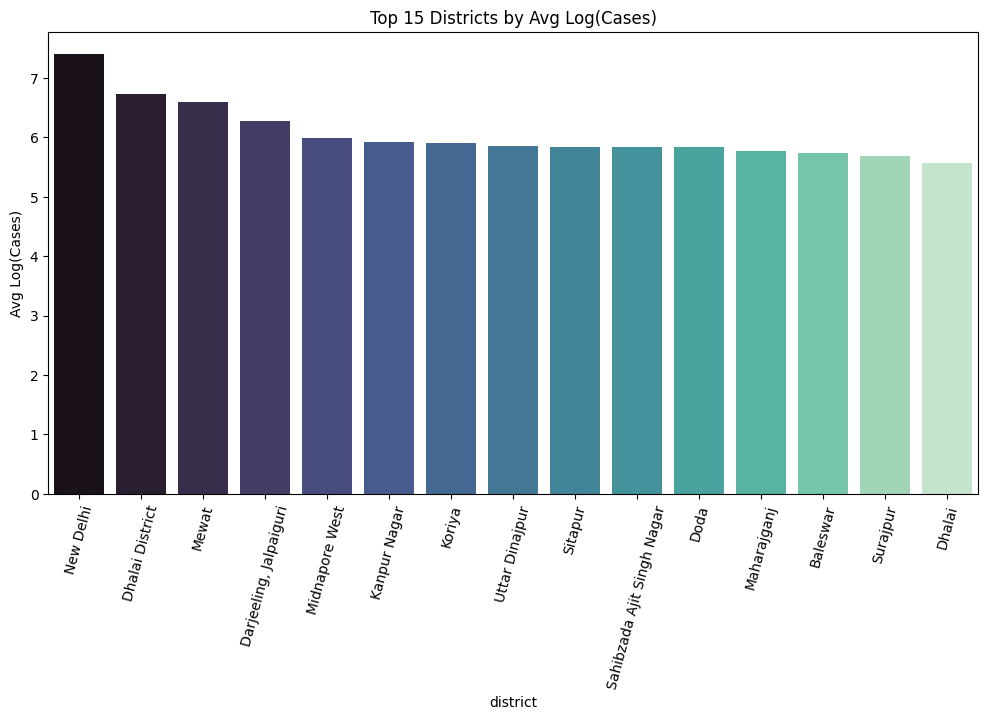

In [176]:
# Top Districts and States
top_districts = df.groupby("district")["Cases_log"].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_districts.index, y=top_districts.values, palette="mako")
plt.xticks(rotation=75)
plt.title("Top 15 Districts by Avg Log(Cases)")
plt.ylabel("Avg Log(Cases)")
plt.show()

/tmp/ipython-input-2587614883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="magma")


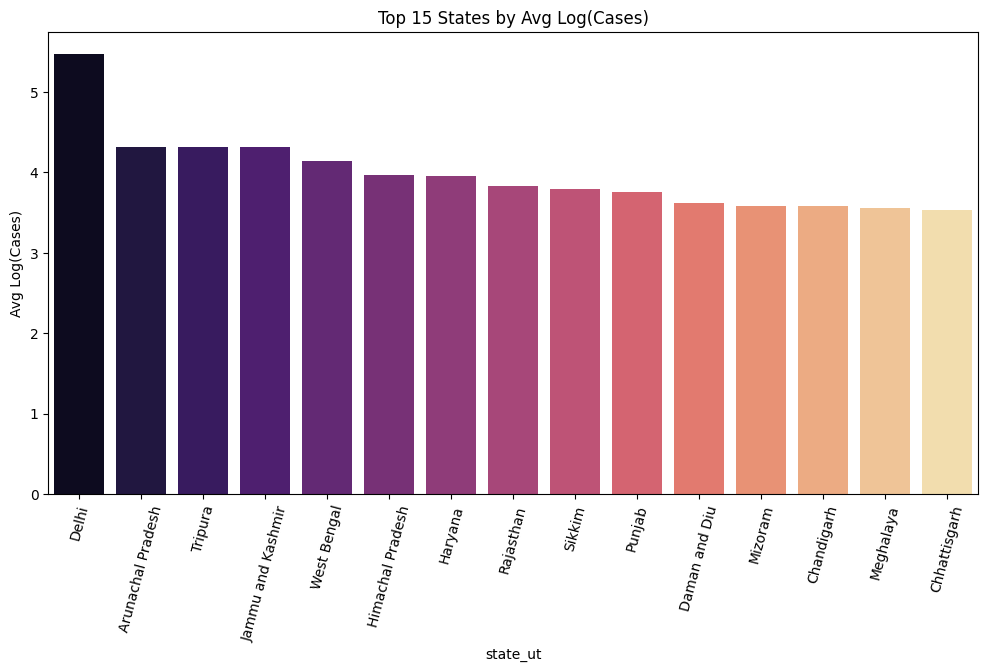

In [177]:
top_states = df.groupby("state_ut")["Cases_log"].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values, palette="magma")
plt.xticks(rotation=75)
plt.title("Top 15 States by Avg Log(Cases)")
plt.ylabel("Avg Log(Cases)")
plt.show()


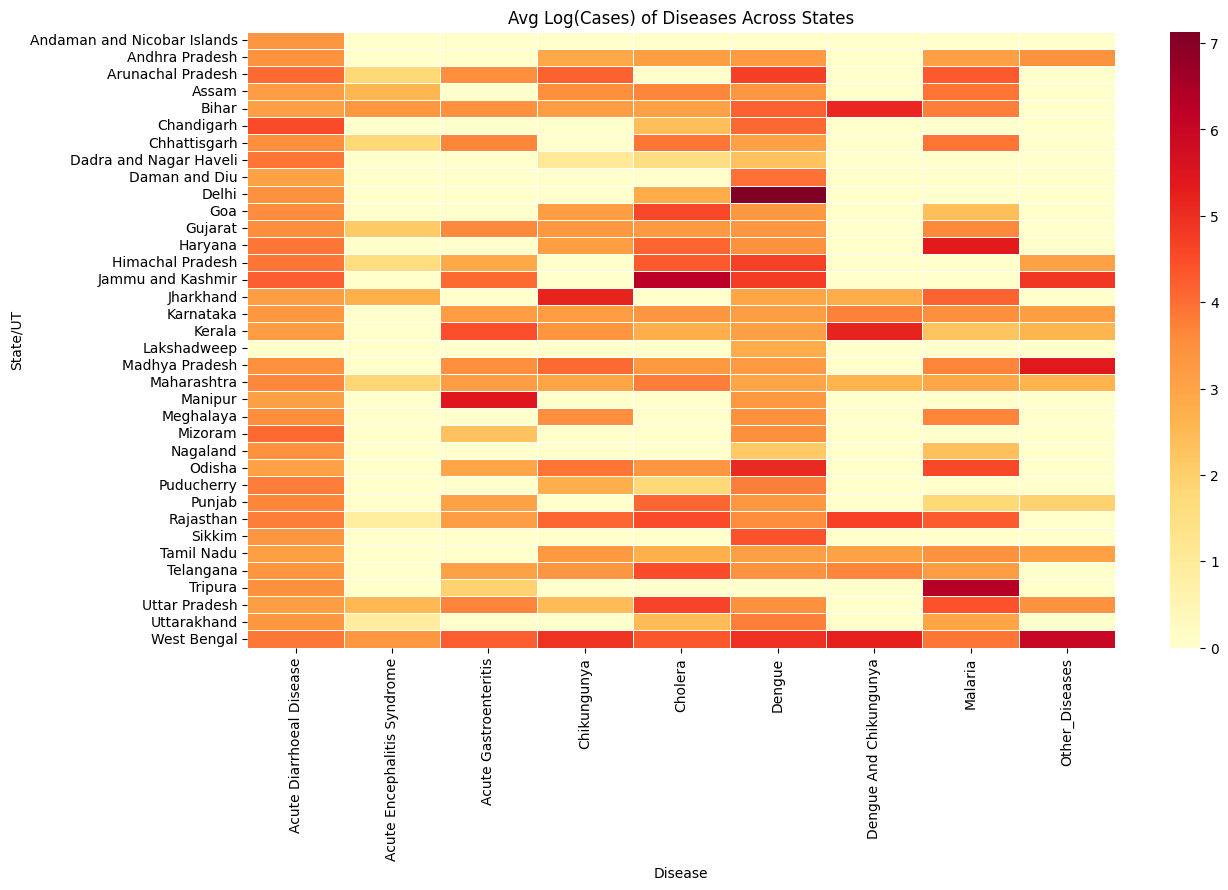


 EDA with Log Transformation Completed Successfully!


In [178]:
# Heatmap: Disease vs State
pivot_table = df.pivot_table(values="Cases_log", index="state_ut", columns="Disease", aggfunc="mean").fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table, cmap="YlOrRd", linewidths=0.5)
plt.title("Avg Log(Cases) of Diseases Across States")
plt.xlabel("Disease")
plt.ylabel("State/UT")
plt.show()

print("\n EDA with Log Transformation Completed Successfully!")

**Feature Selection**

In [179]:
# ----------------------
# Use the transformed dataset
# ----------------------
X = df_encoded.drop(columns=["Cases", "Cases_log"])  # features
y_cases = df["Cases"]
y_disease = df["Disease"]
y_state = df["state_ut"]

# =========================
# 1. Train/test split for Cases Prediction (Regression)
# =========================
X_cases_train, X_cases_test, y_cases_train, y_cases_test = train_test_split(
    X, y_cases, test_size=0.2, shuffle=False
)

# =========================
# 2. Train/test split for Disease Prediction (Classification)
# =========================
X_disease_train, X_disease_test, y_disease_train, y_disease_test = train_test_split(
    X, y_disease, test_size=0.2, random_state=42, stratify=y_disease
)

# =========================
# 3. Train/test split for State Prediction (Classification)
# =========================
X_state_train, X_state_test, y_state_train, y_state_test = train_test_split(
    X, y_state, test_size=0.2, random_state=42, stratify=y_state
)

print("rain/Test Split Completed")
print("Cases →", X_cases_train.shape, X_cases_test.shape)
print("Disease →", X_disease_train.shape, X_disease_test.shape)
print("State →", X_state_train.shape, X_state_test.shape)

# ----------------------
# Scaling numeric columns (important for regression & some classifiers)
# ----------------------
numeric_cols = ["day", "mon", "year", "Latitude", "Longitude",
                "preci", "LAI", "Temp", "Cases_lag1",
                "Cases_lag2", "Cases_roll3"]

scaler = StandardScaler()

# Scale only regression dataset (cases)
X_cases_train[numeric_cols] = scaler.fit_transform(X_cases_train[numeric_cols])
X_cases_test[numeric_cols] = scaler.transform(X_cases_test[numeric_cols])


rain/Test Split Completed
Cases → (7188, 803) (1797, 803)
Disease → (7188, 803) (1797, 803)
State → (7188, 803) (1797, 803)
